
Coefficients: 
1.00513714286
0.864182857143
0.843657142857

Error:
 0.0165569493394


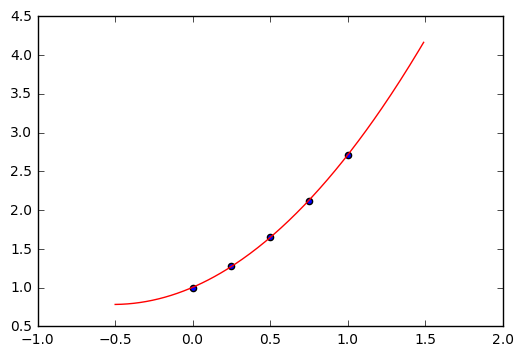

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

"""
This function performs the algorithm in the assignment.
"""
def SVD_least_squares(x,y,degree):

    # Empty array with number of coefficients we want.
    coef = np.zeros(degree+1)

    # Number of points we have, 0-(n-1).
    n = len(x)

    # Empty 'A' matrix of the correct size.
    A = np.zeros( ( n, len(coef) ) )

    # Fill out 'A' matrix.
    A[:,0] = 1
    # Fill out 'A' matrix.
    A[:,0] = 1
    for i in range( len(A) ):
        for j in range( 1, len(A[0]) ):
            A[i,j] = x[i]**j

    # Create our SVD maticies.
    U, s, V = np.linalg.svd(A)

    # Create C
    c = np.dot(U.T,y)

    # Create Z
    z = [ c[i] / s[i] for i in range( len(s) ) ]

    # Find coefficients.
    coef = np.dot(z,V)

    # Define the polynomial and return a solution for a 
    # given 'x' value.
    def f(x):
        sol = sum( coef[i] * x**i for i in range( degree + 1 ) )
        return sol
    
    # Create a vector of P(x) solutions.
    P = [ f(z) for z in x ]

    # Find the error.
    #E = sum( abs( y[i] - f(x[i]) ) for i in range( len(x) ) )
    E = np.linalg.norm( P - y, 2 )

    return coef, E
    
"""
Starting x vector, y vector, and desired degree.
"""
# x values
x = np.array([ 0.0,   0.25,   0.50,   0.75,   1.00])
# y values
y = np.array([1.00, 1.2840, 1.6487, 2.1170, 2.7183])
# Degrees we want
degree = 2

"""
Get coefficients and error, and print the results.
"""
# Solve
coef, error = SVD_least_squares(x, y, degree) 

# Print results
print('\nCoefficients: ')
for i in range( len(coef) ):
    print(coef[i])
print('\nError:\n', error)

"""
Plot the approximating polynomial and scatter plot of real points.
"""
# Define the function with the coefficients found above.
def f(x):
    sol = sum( coef[i] * x**i for i in range( degree + 1 ) )
    return sol

# Plot the polynomial in red.
s = np.arange(-0.5, 1.5, 0.01)
plt.plot(s,  f(s), 'r')

# Plot the true x and y values in blue.
plt.scatter(x,y)